In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from functions.read_g4bl_data import readTraceData

# Location of G4bl output:
file = 'g4bl-output/AllTracks.txt'

# Define RF period:
f = 325*10**6 # MHz
T = 1/f*10**9 # ns

# Length of period:
len_period = 4200 # mm

# Figure directory:
fig_dir = 'figures/'

In [2]:
# Read in data:
data = readTraceData(file)
z_vals = data['z'].values # mm

# Find indices for first value in each period:
next_z = 0
period_start_z_vals = []
period_start_indices = []
for i in range(len(z_vals)):
    if z_vals[i] > next_z:
        period_start_z_vals.append(z_vals[i])
        period_start_indices.append(i)
        next_z += len_period

# Remove last two periods (for reducing edge fields):
if len(period_start_indices) > 1:
    final_index = period_start_indices[-2]
else:
    final_index = len(z_vals)
data = data.iloc[:final_index-1].copy()
x_vals = data['x'].values; y_vals = data['y'].values; z_vals = data['z'].values # mm
px_vals = data['px'].values; py_vals = data['py'].values; pz_vals = data['pz'].values; ptotal_vals = data['ptotal'].values # MeV/c
t_vals = data['t'].values # ns
Bx_vals = data['Bx'].values; By_vals = data['By'].values; Bz_vals = data['Bz'].values # T
xp_vals = data['xp'].values; yp_vals = data['yp'].values # radians
r_vals = data['r'].values # mm
theta_vals = data['theta'].values # radians
rp_vals = data['rp'].values # radians
thetap_vals = data['thetap'].values # radians
Lz_vals = data['Lz'].values # mm*MeV/c

In [9]:
# Find peak on-axis B field:
peak_Bz = np.max(Bz_vals)
print(f'Bz0 = {peak_Bz}')

Bz0 = 3.28247


In [10]:
# Calculate phase advance:
p = 200e-3 # GeV
m = 105.7e-3 # GeV
e = 0.303
gamma = np.sqrt(1+(p/m)**2)
beta = p/m/gamma
phi = e*peak_Bz/(2*m*gamma*beta) # rad
phi = phi*180/np.pi # --> deg
print(f'phi = {phi}')

phi = 142.4642956140678


In [ ]:
# Number of solenoids:
n = 6

# Distance between solenoids:
d = 700 # mm

# Solenoid length:
L = 300 # mm

### Define function to plot lines indicating solenoid placement:
def plot_solenoids(ax):
    for i in range(n):
        center = 500+i*d
        if np.mod(i,2) == 0: # positive polarity
            ax.axvspan(xmin=center-L/2, xmax=center+L/2, color='gray', alpha=0.1)
        else: # negative polarity
            ax.axvspan(xmin=center-L/2, xmax=center+L/2, color='gray', alpha=0.2)

### Full channel plots

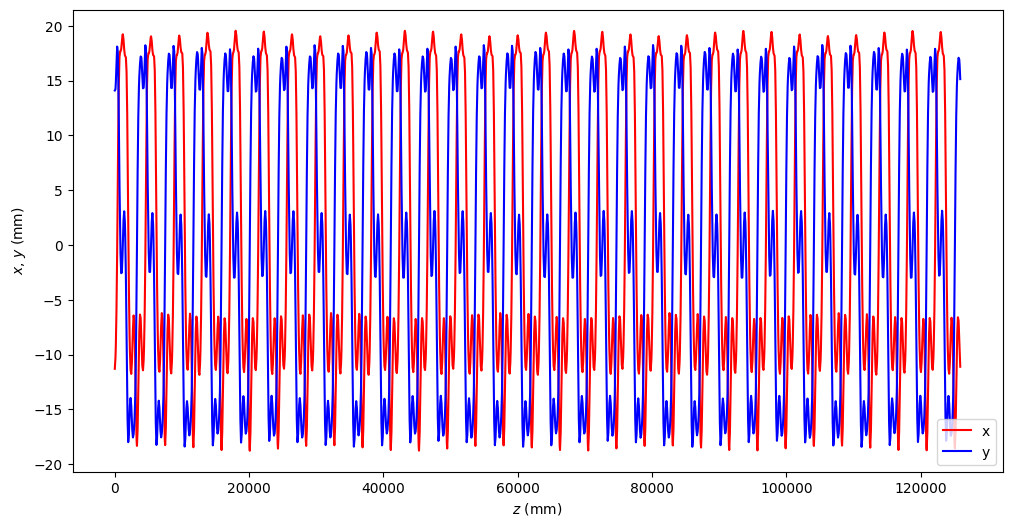

In [6]:
# Plot x, y vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('$z$ (mm)')
plt.ylabel('$x$, $y$ (mm)')
plt.legend()
plt.show()

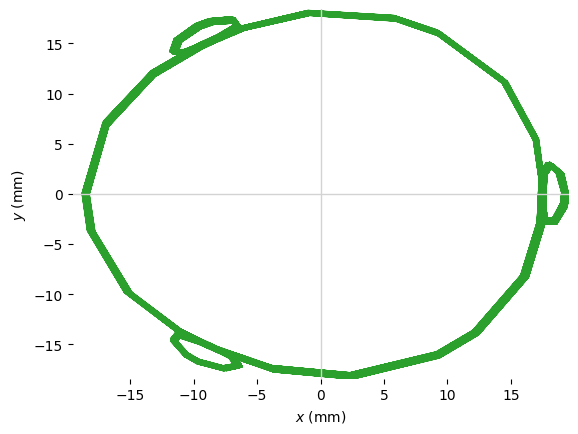

In [7]:
# Plot orbit in transverse plane:
plt.figure()
plt.plot(x_vals, y_vals,color='tab:green')
xlim = max(abs(min(x_vals)), abs(max(x_vals)))
ylim = max(abs(min(y_vals)), abs(max(y_vals)))
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1)
plt.axvline(0, color='lightgray', linewidth=1)
plt.xlabel('$x$ (mm)')
plt.ylabel('$y$ (mm)')
plt.show()

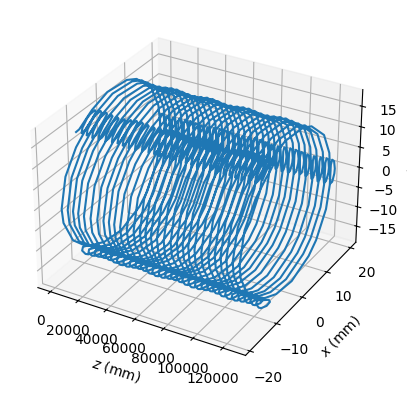

In [8]:
# 3D plot of trajectory:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$x$ (mm)')
ax.set_zlabel('$y$ (mm)')
plt.show()

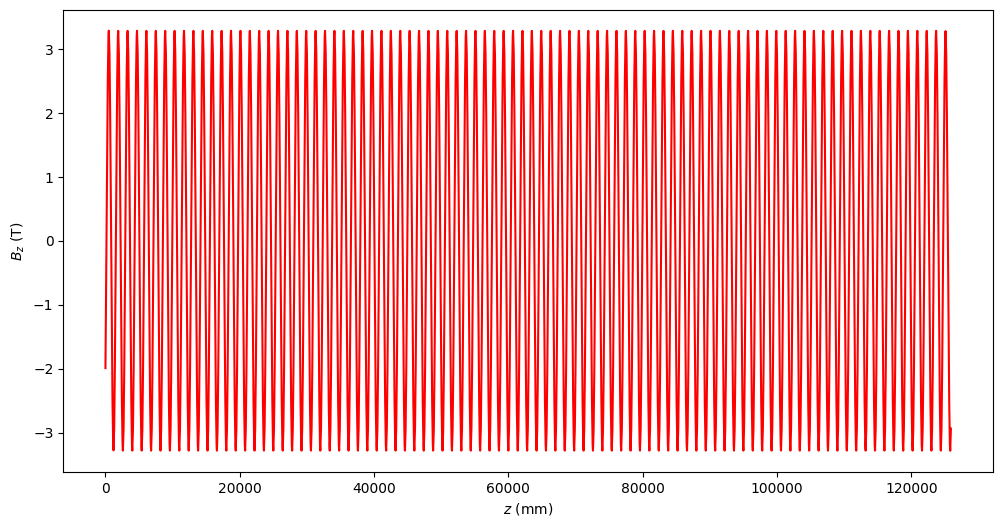

In [9]:
# Plot B_z vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Bz_vals,color='red')
plt.xlabel('$z$ (mm)')
plt.ylabel('$B_z$ (T)')
plt.show()

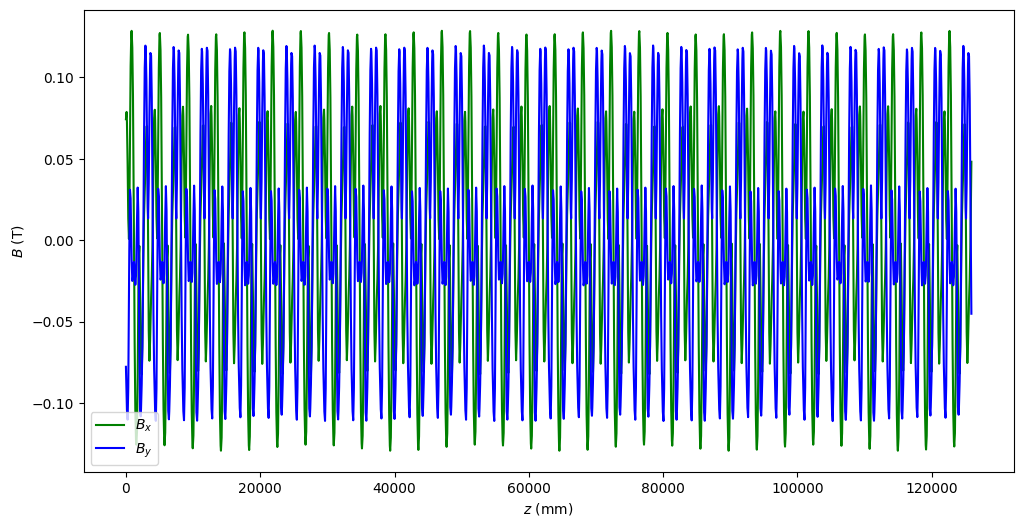

In [10]:
# Plot B_x, B_y vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Bx_vals,color='green',label='$B_x$')
plt.plot(z_vals,By_vals,color='blue',label='$B_y$')
plt.xlabel('$z$ (mm)')
plt.ylabel('$B$ (T)')
plt.legend()
plt.show()

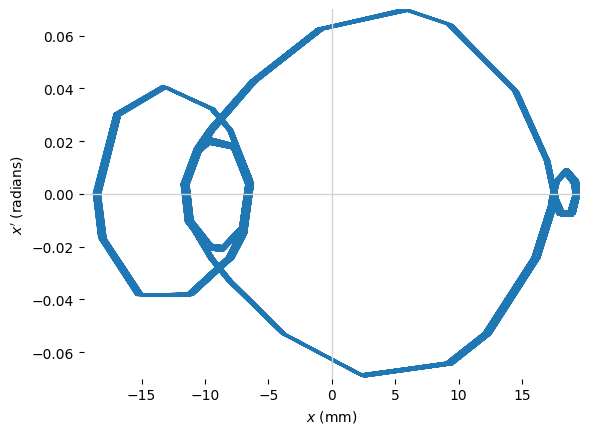

In [11]:
# Plot phase space trajectory (x):
plt.figure()
plt.plot(x_vals, xp_vals,color='tab:blue')
xlim = max(abs(min(x_vals)), abs(max(x_vals)))
ylim = max(abs(min(xp_vals)), abs(max(xp_vals)))
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1)
plt.axvline(0, color='lightgray', linewidth=1)
plt.xlabel('$x$ (mm)')
plt.ylabel('$x^{\prime}$ (radians)')
plt.show()

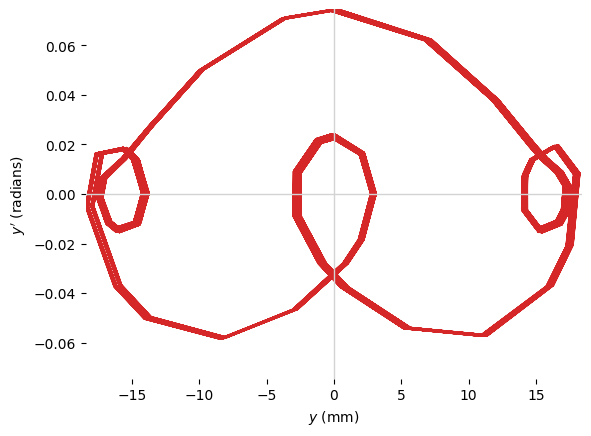

In [12]:
# Plot phase space trajectory (y):
plt.figure()
plt.plot(y_vals, yp_vals,color='tab:red')
xlim = max(abs(min(y_vals)), abs(max(y_vals)))
ylim = max(abs(min(yp_vals)), abs(max(yp_vals)))
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
for spine in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[spine].set_visible(False)
plt.axhline(0, color='lightgray', linewidth=1)
plt.axvline(0, color='lightgray', linewidth=1)
plt.xlabel('$y$ (mm)')
plt.ylabel('$y^{\prime}$ (radians)')
plt.show()

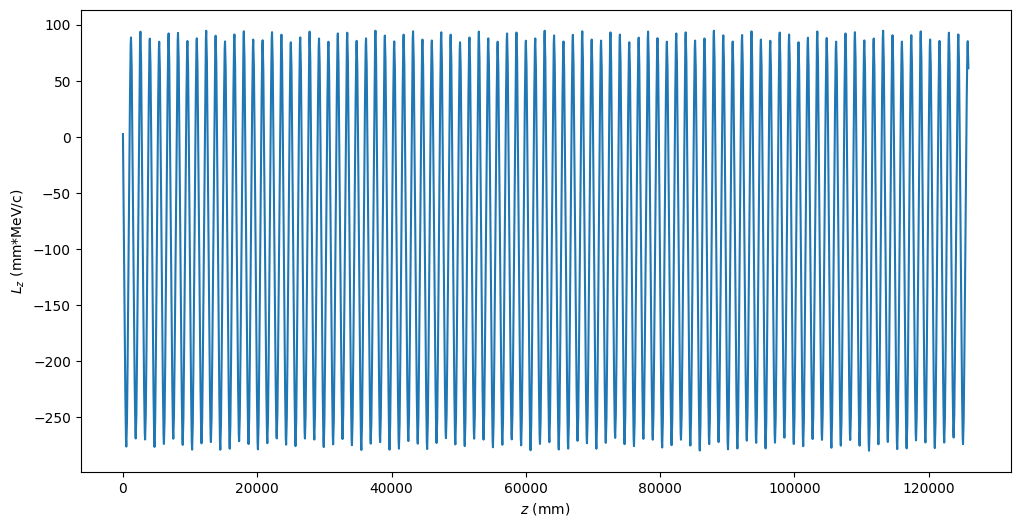

In [13]:
# Plot L_z vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Lz_vals)
plt.xlabel('$z$ (mm)')
plt.ylabel('$L_z$ (mm*MeV/c)')
plt.show()

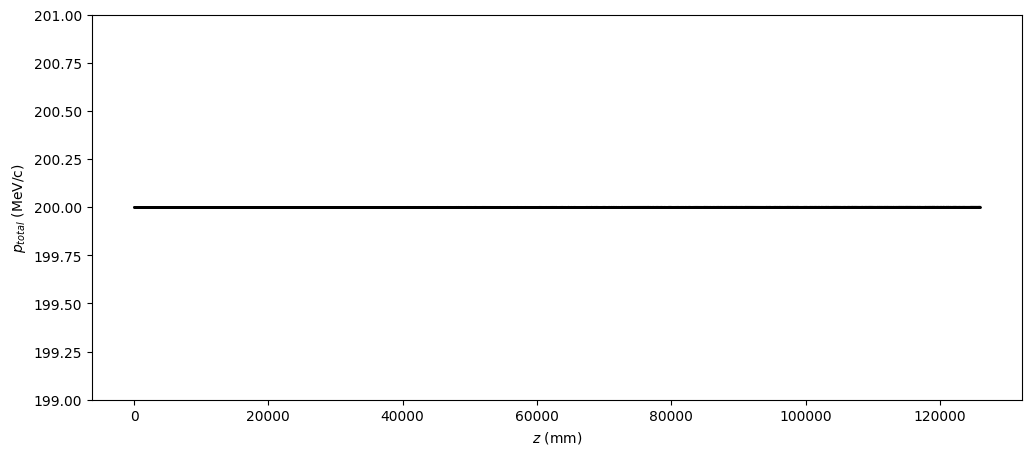

In [14]:
# Plot p_total vs. z:
plt.figure(figsize=(12,5))
plt.scatter(z_vals,ptotal_vals,color='black',s=1)
plt.plot(z_vals,ptotal_vals,color='black',alpha=0.5)
plt.ylim(199,201)
plt.xlabel('$z$ (mm)')
plt.ylabel('$p_{total}$ (MeV/c)')
plt.show()

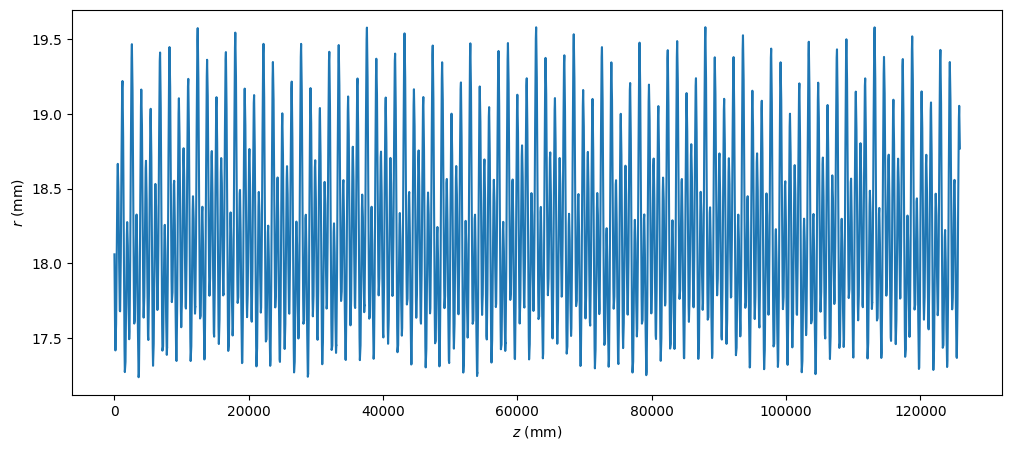

In [15]:
# Plot r vs. z:
plt.figure(figsize=(12,5))
plt.plot(z_vals,r_vals)
plt.xlabel('$z$ (mm)')
plt.ylabel('$r$ (mm)')
plt.show()

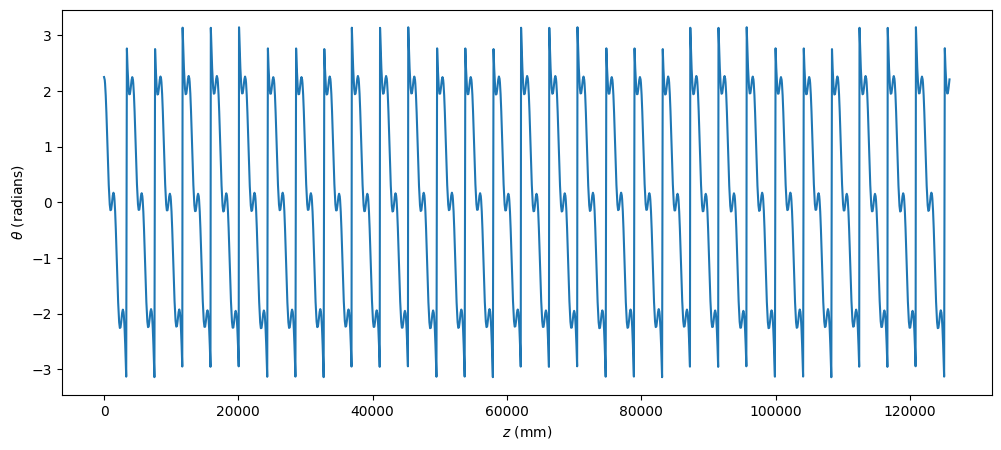

In [16]:
# Plot theta vs. z:
plt.figure(figsize=(12,5))
plt.plot(z_vals,theta_vals)
plt.xlabel('$z$ (mm)')
plt.ylabel(r'$\theta$ (radians)')
plt.show()

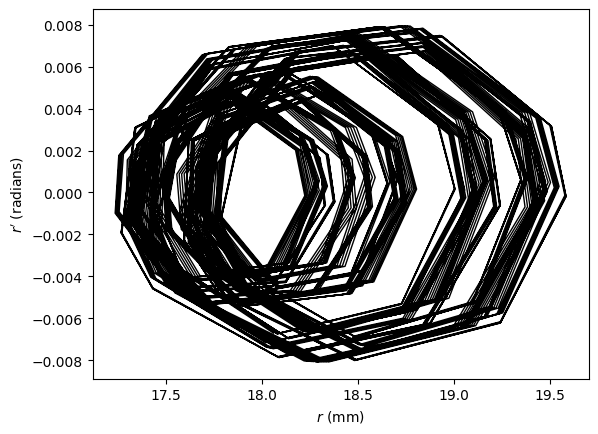

In [19]:
# Plot polar (r) phase space:
plt.plot(r_vals, rp_vals, color='black', linewidth=1)
plt.xlabel('$r$ (mm)')
plt.ylabel('$r^{\prime}$ (radians)')
plt.show()

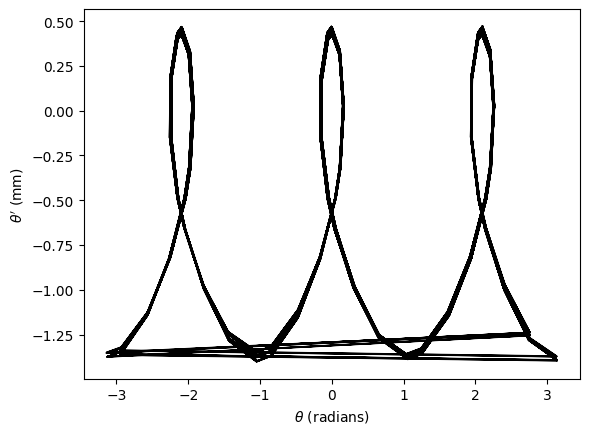

In [24]:
# Plot polar (theta) phase space:
plt.plot(theta_vals,thetap_vals,color='black',linewidth=1)
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$\theta^{\prime}$ (mm)')
plt.show()

### Single period plots

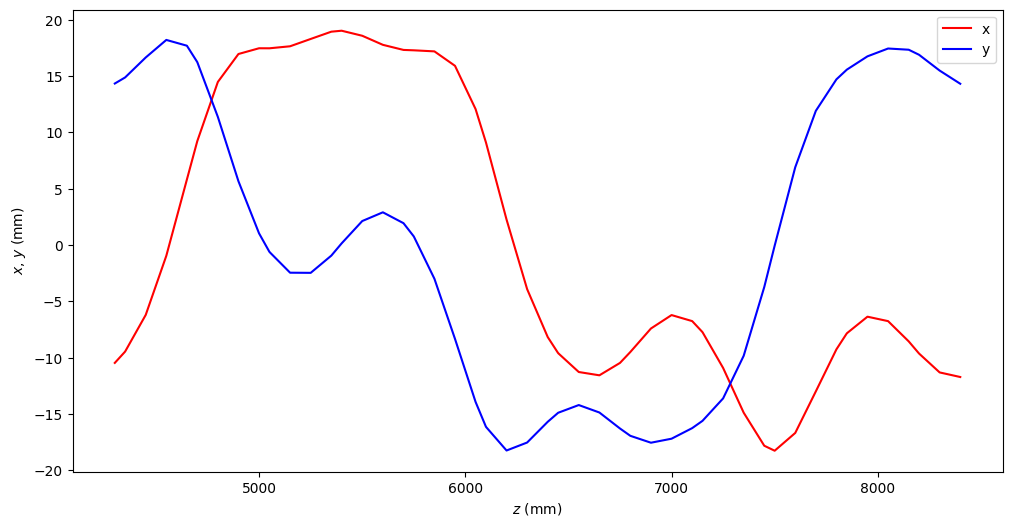

In [39]:
# Plot x, y vs. z for second period only:
plt.figure(figsize = (12,6))
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],x_vals[period_start_indices[1]:period_start_indices[2]],color='red',label='x')
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],y_vals[period_start_indices[1]:period_start_indices[2]],color='blue',label='y')
plt.xlabel('$z$ (mm)')
plt.ylabel('$x$, $y$ (mm)')
plt.legend()
plt.show()

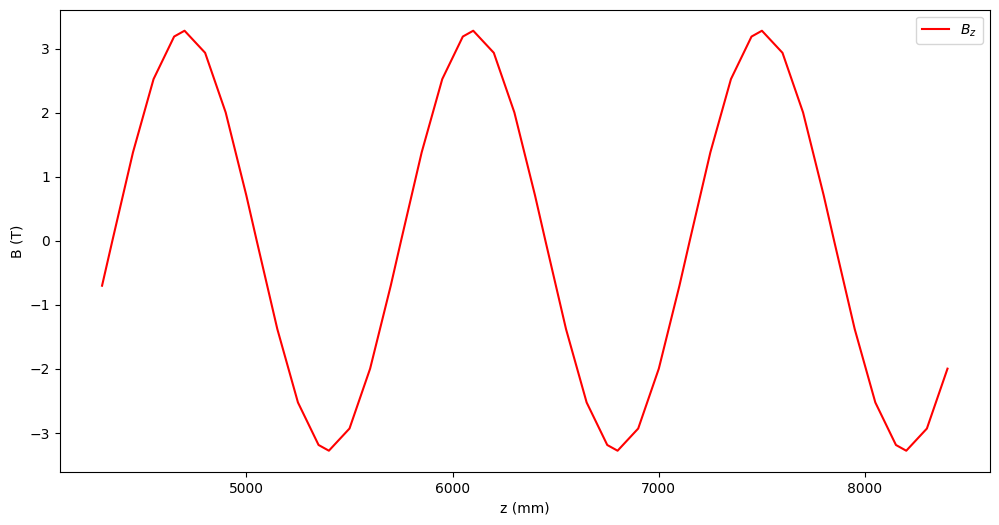

In [40]:
# Plot B_z vs. z:
start = period_start_indices[1]
end = period_start_indices[2]
plt.figure(figsize = (12,6))
plt.plot(z_vals[start:end],Bz_vals[start:end],color='red',label='$B_z$')
plt.xlabel('z (mm)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

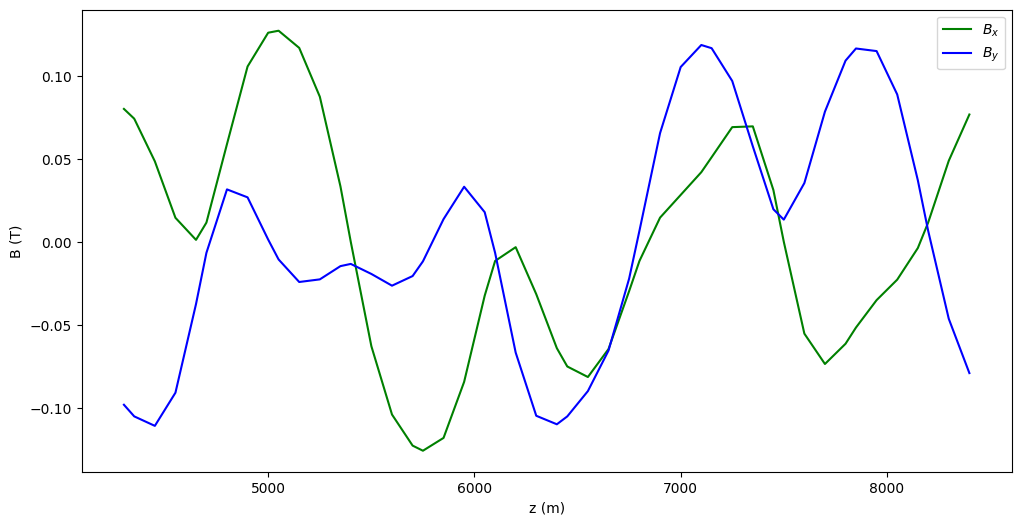

In [41]:
# Plot B_x, B_y vs. z:
plt.figure(figsize = (12,6))
plt.plot(z_vals[start:end],Bx_vals[start:end],color='green',label='$B_x$')
plt.plot(z_vals[start:end],By_vals[start:end],color='blue',label='$B_y$')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

### Animations

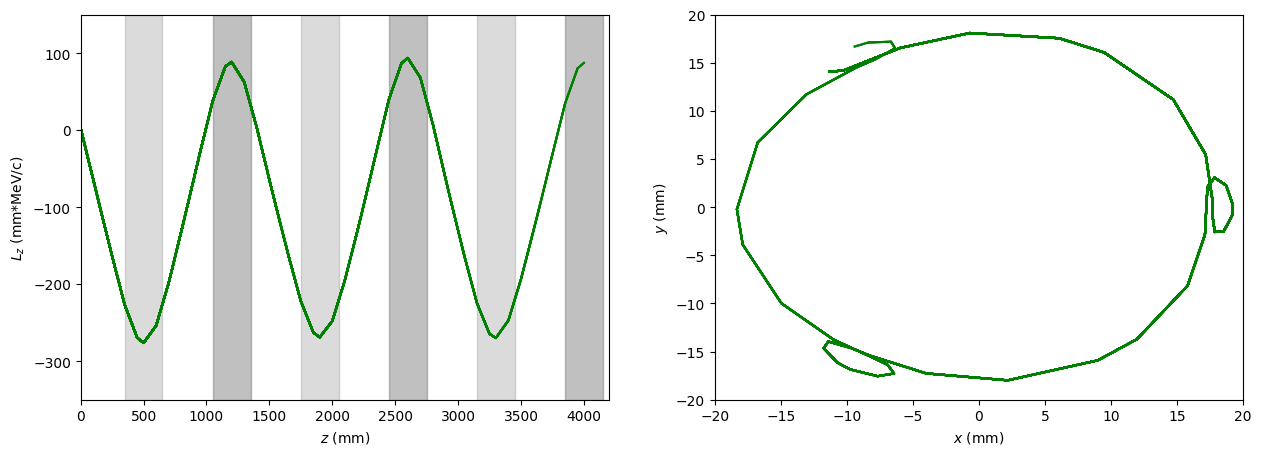

In [49]:
# Animation of orbit and L_z vs. z:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    if frame == 0:
        plot_solenoids(ax1)

    # L_z plot:
    ax1.plot(z_vals[:frame],Lz_vals[:frame],color='green')
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-350,150))
    ax1.set_ylabel('$L_z$ (mm*MeV/c)')
    ax1.set_xlabel('$z$ (mm)')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='green')
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-20,20))
    ax2.set_xlabel('$x$ (mm)')
    ax2.set_ylabel('$y$ (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[1]:period_start_indices[2]]), interval=250, repeat=True)
animation.save(fig_dir+'Lz_and_xy.gif', writer='pillow')

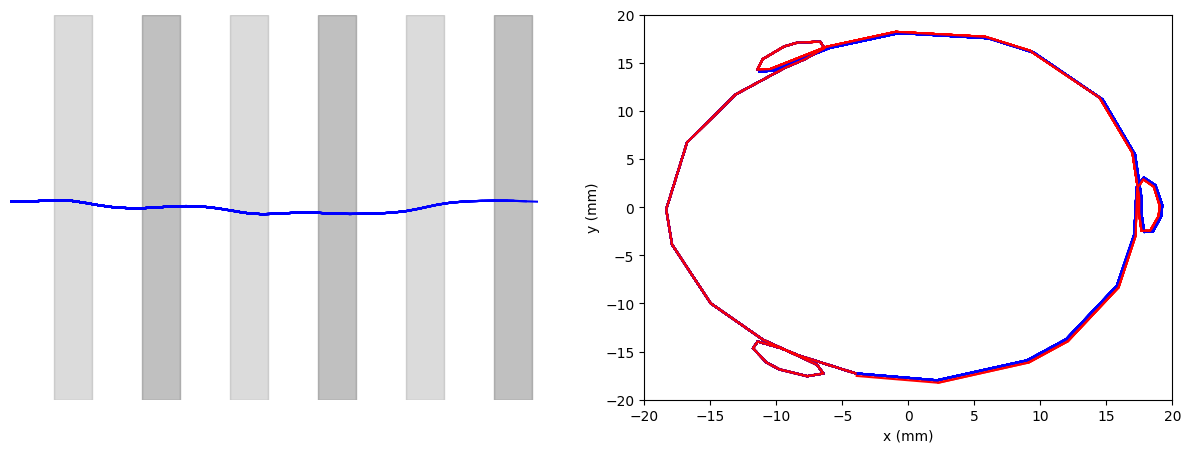

In [44]:
# Generate mu- orbit:
start = int( (period_start_indices[1] - period_start_indices[0]) /2 )
end = period_start_indices[1] + start
minus_x = x_vals[start:end]
minus_y = y_vals[start:end]

# Animation of trajectory in yz- and xy-planes for both signs:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sol_placements = np.arange(z_vals[period_start_indices[0]],z_vals[period_start_indices[1]+2],0.7)
def animate(frame):

    if frame == 0:
        plot_solenoids(ax1)

    # y,z plot:
    ax1.plot(z_vals[:frame],y_vals[:frame],color='blue')
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-500,500))
    ax1.set_ylabel('y (mm)')
    ax1.set_xlabel('z (mm)')
    ax1.axis('off')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='blue') # mu+
    ax2.plot(minus_x[:frame],minus_y[:frame],color='red') # mu-
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-20,20))
    ax2.set_xlabel('x (mm)')
    ax2.set_ylabel('y (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'yz_and_xy_both_signs.gif', writer='pillow')

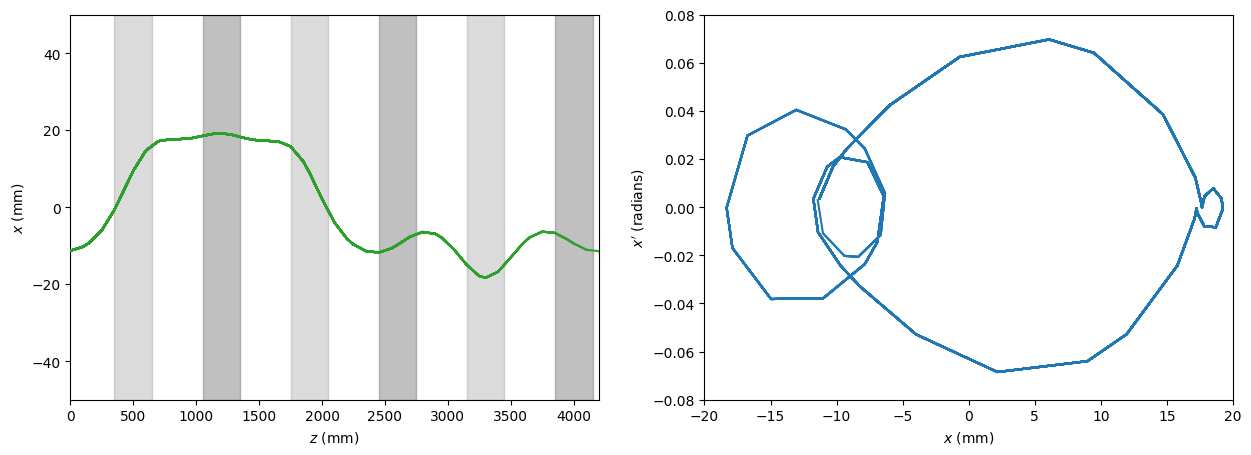

In [29]:
# Animation of trajectory in xz-plane and x-x' phase space:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    if frame == 0:
        plot_solenoids(ax1)

    # x,z plot:
    ax1.plot(z_vals[:frame],x_vals[:frame],color='tab:green',zorder=10)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-50,50))
    ax1.set_ylabel('$x$ (mm)')
    ax1.set_xlabel('$z$ (mm)')

    # x,x' plot:
    ax2.plot(x_vals[:frame],xp_vals[:frame],color='tab:blue')
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-0.08,0.08))
    ax2.set_xlabel('$x$ (mm)')
    ax2.set_ylabel('$x^{\prime}$ (radians)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_x.gif', writer='pillow')

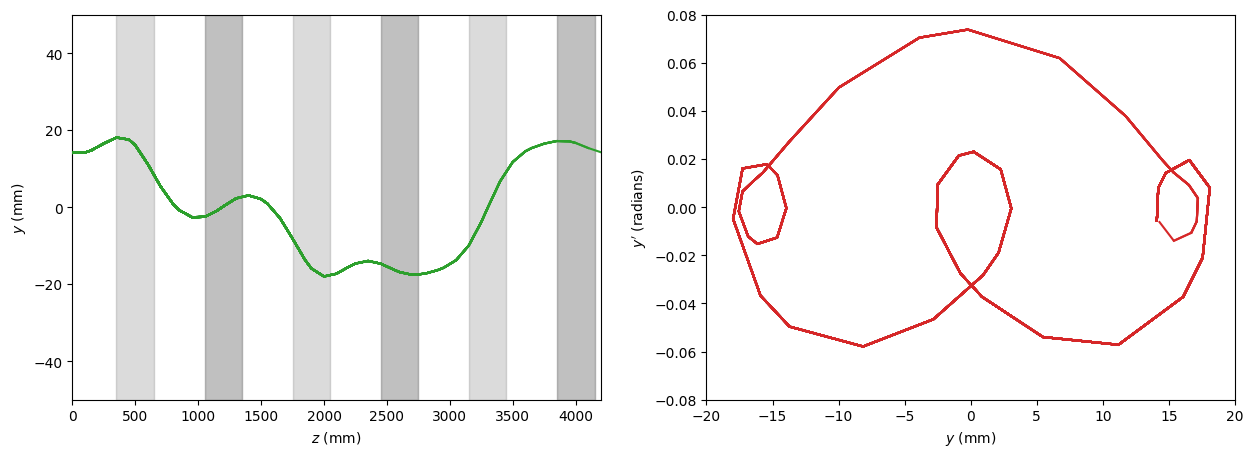

In [30]:
# Animation of trajectory in yz-plane and y-y' phase space:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    if frame == 0:
        plot_solenoids(ax1)

    # x,z plot:
    ax1.plot(z_vals[:frame],y_vals[:frame],color='tab:green',zorder=10)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((-50,50))
    ax1.set_ylabel('$y$ (mm)')
    ax1.set_xlabel('$z$ (mm)')

    # y,y' plot:
    ax2.plot(y_vals[:frame],yp_vals[:frame],color='tab:red')
    ax2.set_xlim((-20,20))
    ax2.set_ylim((-0.08,0.08))
    ax2.set_xlabel('$y$ (mm)')
    ax2.set_ylabel('$y^{\prime}$ (radians)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_y.gif', writer='pillow')

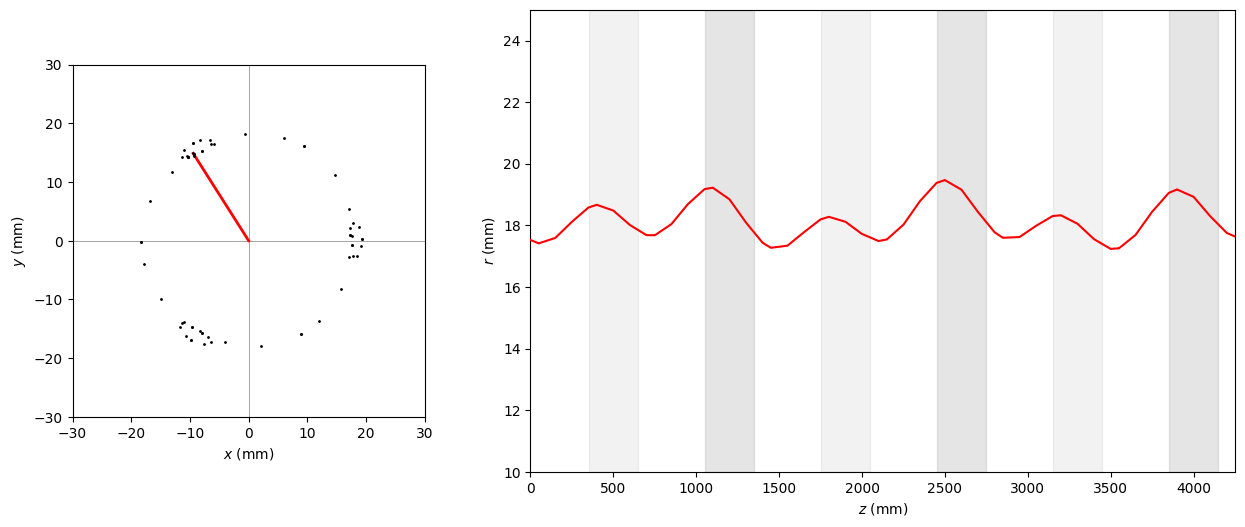

In [ ]:
# Animate radial vector and r vs. z:

start_idx = period_start_indices[0]
end_idx = period_start_indices[1] + 2
frame_count = end_idx - start_idx

x_vals_anim = x_vals[start_idx:end_idx]
y_vals_anim = y_vals[start_idx:end_idx]
r_vals_anim = r_vals[start_idx:end_idx]
z_vals_anim = z_vals[start_idx:end_idx]

z_offset = z_vals_anim[0]
z_vals_anim_zeroed = z_vals_anim - z_offset

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15, 6),
    gridspec_kw={'width_ratios': [1, 2]}
)

ax1.set_aspect('equal')
ax1.set_xlim(-30, 30)
ax1.set_ylim(-30, 30)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_xlabel('$x$ (mm)')
ax1.set_ylabel('$y$ (mm)')
line1, = ax1.plot([], [], 'r-', lw=2)
points1, = ax1.plot([], [], 'k.', markersize=2)

ax2.set_xlim(0, z_vals_anim_zeroed[-1])
ax2.set_ylim(10, 25)
ax2.set_xlabel('$z$ (mm)')
ax2.set_ylabel('$r$ (mm)')
plot_solenoids(ax2)
line2, = ax2.plot([], [], color='red', zorder=10)

x_history = []
y_history = []
z_history = []
r_history = []

def animate_combined(frame):

    x = x_vals_anim[frame]
    y = y_vals_anim[frame]
    r = r_vals_anim[frame]
    z = z_vals_anim_zeroed[frame]


    line1.set_data([0, x], [0, y])
    x_history.append(x)
    y_history.append(y)
    points1.set_data(x_history, y_history)


    z_history.append(z)
    r_history.append(r)
    line2.set_data(z_history, r_history)

    return line1, points1, line2

ani = FuncAnimation(
    fig, animate_combined,
    frames=frame_count, interval=250, blit=True
)

ani.save(fig_dir + 'r_vs_z.gif', writer='pillow')

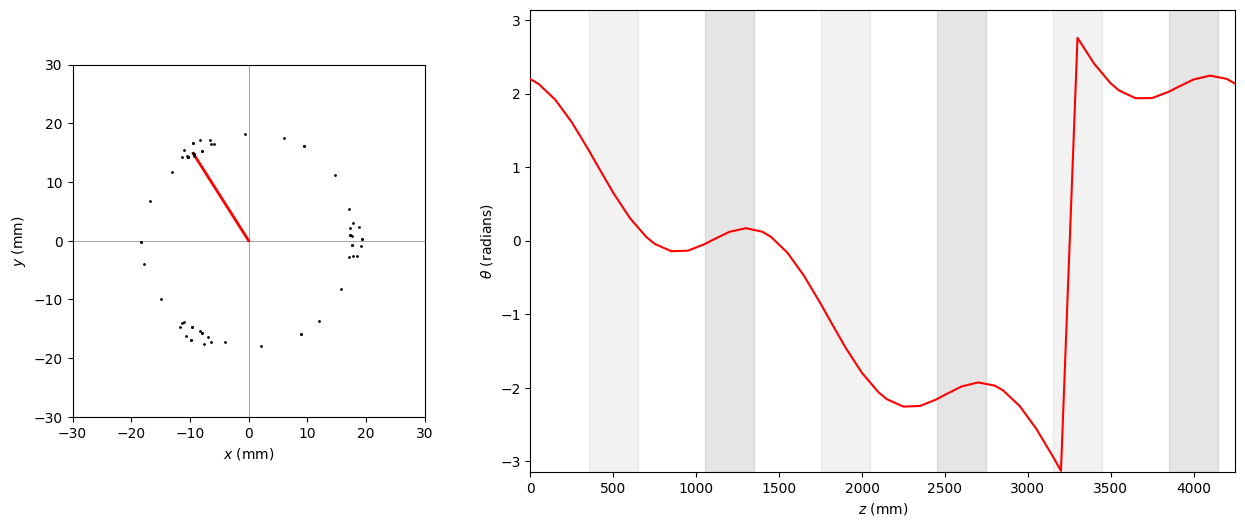

In [ ]:
# Animate radial vector and theta vs. z:

start_idx = period_start_indices[0]
end_idx = period_start_indices[1] + 2
frame_count = end_idx - start_idx

x_vals_anim = x_vals[start_idx:end_idx]
y_vals_anim = y_vals[start_idx:end_idx]
r_vals_anim = r_vals[start_idx:end_idx]
z_vals_anim = z_vals[start_idx:end_idx]
theta_vals_anim = theta_vals[start_idx:end_idx]

z_offset = z_vals_anim[0]
z_vals_anim_zeroed = z_vals_anim - z_offset

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15, 6),
    gridspec_kw={'width_ratios': [1, 2]}
)

ax1.set_aspect('equal')
ax1.set_xlim(-30, 30)
ax1.set_ylim(-30, 30)
ax1.axhline(0, color='gray', lw=0.5)
ax1.axvline(0, color='gray', lw=0.5)
ax1.set_xlabel('$x$ (mm)')
ax1.set_ylabel('$y$ (mm)')
line1, = ax1.plot([], [], 'r-', lw=2)
points1, = ax1.plot([], [], 'k.', markersize=2)

ax2.set_xlim(0, z_vals_anim_zeroed[-1])
ax2.set_ylim(-np.pi, np.pi)
ax2.set_xlabel('$z$ (mm)')
ax2.set_ylabel(r'$\theta$ (radians)')
plot_solenoids(ax2)
line2, = ax2.plot([], [], color='red', zorder=10)

x_history = []
y_history = []
z_history = []
theta_history = []

def animate_combined(frame):

    x = x_vals_anim[frame]
    y = y_vals_anim[frame]
    z = z_vals_anim_zeroed[frame]
    theta = theta_vals_anim[frame]

    line1.set_data([0, x], [0, y])
    x_history.append(x)
    y_history.append(y)
    points1.set_data(x_history, y_history)

    z_history.append(z)
    theta_history.append(theta)
    line2.set_data(z_history, theta_history)

    return line1, points1, line2

ani = FuncAnimation(
    fig, animate_combined,
    frames=frame_count, interval=250, blit=True
)

ani.save(fig_dir + 'theta_vs_z.gif', writer='pillow')

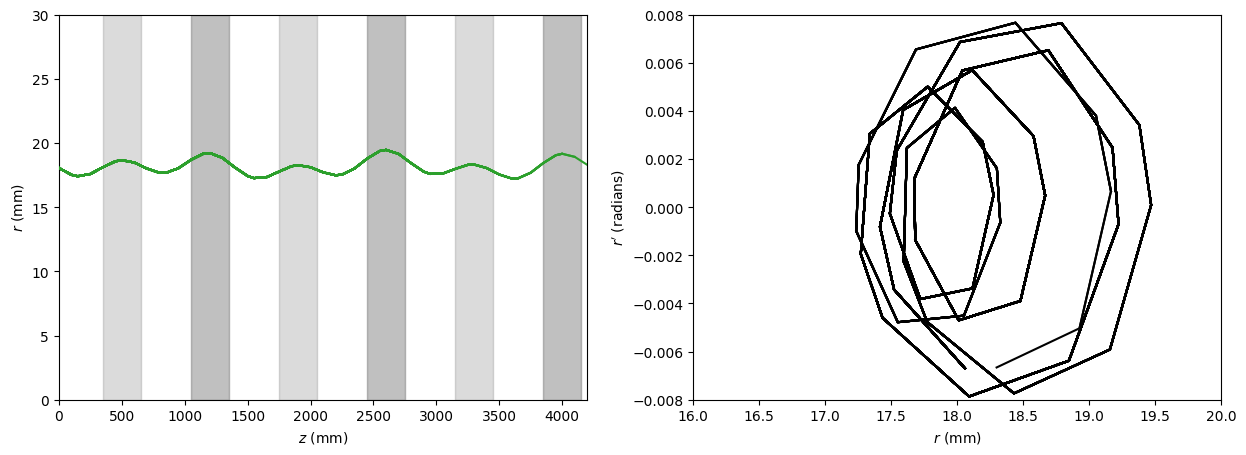

In [33]:
# Animation of r vs. z and r vs. r':
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    if frame == 0:
        plot_solenoids(ax1)

    # r vs. z plot:
    ax1.plot(z_vals[:frame],r_vals[:frame],color='tab:green',zorder=10)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((0,30))
    ax1.set_ylabel('$r$ (mm)')
    ax1.set_xlabel('$z$ (mm)')

    # r' vs. r plot:
    ax2.plot(r_vals[:frame],rp_vals[:frame],color='black')
    ax2.set_xlim((16,20))
    ax2.set_ylim((-0.008,0.008))
    ax2.set_xlabel('$r$ (mm)')
    ax2.set_ylabel('$r^{\prime}$ (radians)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_r.gif', writer='pillow')

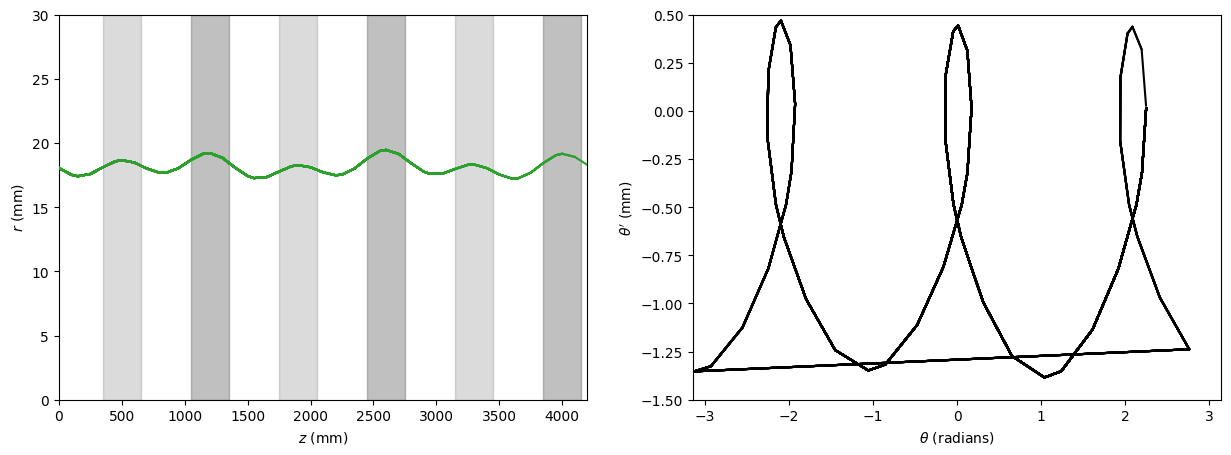

In [21]:
# Animation of r vs. z and theta vs. theta':
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    if frame == 0:
        plot_solenoids(ax1)

    # r vs. z plot:
    ax1.plot(z_vals[:frame],r_vals[:frame],color='tab:green',zorder=10)
    ax1.set_xlim((0,4200))
    ax1.set_ylim((0,30))
    ax1.set_ylabel('$r$ (mm)')
    ax1.set_xlabel('$z$ (mm)')

    # theta' vs. theta plot:
    ax2.plot(theta_vals[:frame],thetap_vals[:frame],color='black')
    ax2.set_xlim((-np.pi,np.pi))
    ax2.set_ylim((-1.5,0.5))
    ax2.set_xlabel(r'$\theta$ (radians)')
    ax2.set_ylabel(r'$\theta^{\prime}$ (mm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals[period_start_indices[0]:period_start_indices[1]+2]), interval=250, repeat=True)
animation.save(fig_dir+'phase_space_theta.gif', writer='pillow')